<a href="https://colab.research.google.com/github/rinogrego/VizBREF/blob/main/Fbref_Data_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4
!pip install soccerplots

In [2]:
import numpy as np
import pandas as pd
import bs4
import requests
import re
import matplotlib.pyplot as plt

# Scraping

In [3]:
def get_html_document(url):
    # request for HTML document of given url
    response = requests.get(url)
    # response will be provided in JSON format
    return response.text

## Key-Value Pairs of Competitions

In [158]:
epl = (9, 'Premier-League')
la_liga = (12, 'La-Liga')
serie_a = (11, 'Serie-A')
ligue_1 = (13, 'Ligue-1')
bundesliga = (20, 'Bundesliga')
LEAGUES = [epl, la_liga, serie_a, ligue_1, bundesliga]
db = {}

## Scrap Competitions Data

In [72]:
def scrap_league(league_id, league_name):
  league_url = f'https://fbref.com/en/comps/{league_id}/{league_name}-Stats'
  html_doc = get_html_document(league_url)
  soup = bs4.BeautifulSoup(html_doc, 'html.parser')

  lg_table_soup = soup.find_all('table')[0]

  return lg_table_soup

In [78]:
lg_soup = scrap_league(ligue_1[0], ligue_1[1])

In [79]:
team_urls = []

for link in lg_soup.find_all('a', attrs={'href': re.compile("^/en/squads/")}):
  team_url = link.get('href')
  team_urls.append(team_url)

# get unique lists of items
team_urls = list(set(team_urls))

In [80]:
team_kv_pairs = []

for link in team_urls:
  # get rid of '/'
  texts = link.split('/')
  # get team id
  id = texts[-2]
  # get team name
  team_name = texts[-1][:-6]
  if id == '' or team_name == '':
    continue
  kv_pair = (id, team_name)
  if kv_pair not in team_kv_pairs:
    team_kv_pairs.append(kv_pair)

In [81]:
team_kv_pairs

[('d53c0b06', 'Lyon'),
 ('d9676424', 'Clermont-Foot'),
 ('132ebc33', 'Nice'),
 ('c0d3eab4', 'Strasbourg'),
 ('fd6114db', 'Monaco'),
 ('69236f98', 'Angers'),
 ('7fdd64e0', 'Reims'),
 ('d2c87802', 'Lorient'),
 ('281b0e73', 'Montpellier'),
 ('d298ef2c', 'Saint-Etienne'),
 ('e2d8892c', 'Paris-Saint-Germain'),
 ('b3072e00', 'Rennes'),
 ('123f3efe', 'Bordeaux'),
 ('f83960ae', 'Metz'),
 ('fd4e0f7d', 'Lens'),
 ('d7a486cd', 'Nantes'),
 ('5725cc7b', 'Marseille'),
 ('54195385', 'Troyes'),
 ('cb188c0c', 'Lille'),
 ('fb08dbb3', 'Brest')]

## Scrap Teams Data

In [9]:
def scrap_team(team_id, team_name):
  team_url = f'https://fbref.com/en/squads/{team_id}/{team_name}-Stats'
  html_doc = get_html_document(team_url)
  soup = bs4.BeautifulSoup(html_doc, 'html.parser')
  return soup

In [96]:
soup = scrap_team('822bd0ba', 'Liverpool')
soup = soup.find_all('table')[0]

<table class="stats_table sortable min_width" data-cols-to-freeze=",1" id="stats_standard_11160"> <caption>Standard Stats <span style="color: #666; font-size:smaller">2021-2022 Liverpool: Premier League</span> Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr class="over_header"> <th aria-label="" class=" over_header center" colspan="4" data-stat=""></th> <th aria-label="" class=" over_header center group_start" colspan="4" data-stat="header_playing">Playing Time</th> <th aria-label="" class=" over_header center group_start" colspan="7" data-stat="header_performance">Performance</th> <th aria-label="" class=" over_header center group_start" colspan="5" data-stat="header_per90">Per 90 Minutes</th> <th aria-label="" class=" over_header center group_start" colspan="4" data-stat="header_expected">Expected</th> <t

In [105]:
player_urls = []

for link in soup.find_all('a', attrs={'href': re.compile("^/en/players/")}):
  player_url = link.get('href')
  if 'summary' in player_url:
    continue
  player_urls.append(player_url)

# get unique lists of items
player_urls = list(set(player_urls))

In [106]:
player_urls

['/en/players/5ed9b537/Ibrahima-Konate',
 '/en/players/7f3b388c/Fabinho',
 '/en/players/f76e6b4e/Adrian',
 '/en/players/2e4f5f03/Andrew-Robertson',
 '/en/players/38c7feef/Alex-Oxlade-Chamberlain',
 '/en/players/19a9cb70/Kaide-Gordon',
 '/en/players/77e84962/Thiago-Alcantara',
 '/en/players/2bc28bb9/Tyler-Morton',
 '/en/players/4125cb98/Jarrell-Quansah',
 '/en/players/4c370d81/Roberto-Firmino',
 '/en/players/f833a830/Takumi-Minamino',
 '/en/players/cd1acf9d/Trent-Alexander-Arnold',
 '/en/players/7a11550b/Joe-Gomez',
 '/en/players/43a166b4/Divock-Origi',
 '/en/players/e342ad68/Mohamed-Salah',
 '/en/players/4fb9c88f/Curtis-Jones',
 '/en/players/515ebe8d/Nathaniel-Phillips',
 '/en/players/8aadeaef/Ben-Woodburn',
 '/en/players/e06683ca/Virgil-van-Dijk',
 '/en/players/a011a1e9/Owen-Beck',
 '/en/players/2f90f6b8/James-Milner',
 '/en/players/935e6b8f/Jordan-Henderson',
 '/en/players/f25c8e3a/Naby-Keita',
 '/en/players/c8387671/Harvey-Elliott',
 '/en/players/dd323728/Neco-Williams',
 '/en/playe

In [107]:
player_kv_pairs = []
for url in player_urls:
  # for player in player_names:
    # if f'/{player}' in url:
  texts = url.split('/')
  id = texts[3]
  player = texts[-1]
  kv = (id, player)
  if kv not in player_kv_pairs:
    player_kv_pairs.append(kv)

In [108]:
player_kv_pairs

[('5ed9b537', 'Ibrahima-Konate'),
 ('7f3b388c', 'Fabinho'),
 ('f76e6b4e', 'Adrian'),
 ('2e4f5f03', 'Andrew-Robertson'),
 ('38c7feef', 'Alex-Oxlade-Chamberlain'),
 ('19a9cb70', 'Kaide-Gordon'),
 ('77e84962', 'Thiago-Alcantara'),
 ('2bc28bb9', 'Tyler-Morton'),
 ('4125cb98', 'Jarrell-Quansah'),
 ('4c370d81', 'Roberto-Firmino'),
 ('f833a830', 'Takumi-Minamino'),
 ('cd1acf9d', 'Trent-Alexander-Arnold'),
 ('7a11550b', 'Joe-Gomez'),
 ('43a166b4', 'Divock-Origi'),
 ('e342ad68', 'Mohamed-Salah'),
 ('4fb9c88f', 'Curtis-Jones'),
 ('515ebe8d', 'Nathaniel-Phillips'),
 ('8aadeaef', 'Ben-Woodburn'),
 ('e06683ca', 'Virgil-van-Dijk'),
 ('a011a1e9', 'Owen-Beck'),
 ('2f90f6b8', 'James-Milner'),
 ('935e6b8f', 'Jordan-Henderson'),
 ('f25c8e3a', 'Naby-Keita'),
 ('c8387671', 'Harvey-Elliott'),
 ('dd323728', 'Neco-Williams'),
 ('7a2e46a8', 'Alisson'),
 ('bbd67769', 'Conor-Bradley'),
 ('c691bfe2', 'Sadio-Mane'),
 ('f315ca93', 'Kostas-Tsimikas'),
 ('178ae8f8', 'Diogo-Jota'),
 ('b217ef29', 'Joel-Matip'),
 ('b3ca

## Create a Big List of Players Data

In [111]:
PREMIER_LEAGUE = [
    ('33c895d4', 'Southampton'),
    ('19538871', 'Manchester-United'),
    ('1c781004', 'Norwich-City'),
    ('822bd0ba', 'Liverpool'),
    ('d3fd31cc', 'Everton'),
    ('5bfb9659', 'Leeds-United'),
    ('a2d435b3', 'Leicester-City'),
    ('2abfe087', 'Watford'),
    ('b8fd03ef', 'Manchester-City'),
    ('b2b47a98', 'Newcastle-United'),
    ('361ca564', 'Tottenham-Hotspur'),
    ('47c64c55', 'Crystal-Palace'),
    ('943e8050', 'Burnley'),
    ('cd051869', 'Brentford'),
    ('cff3d9bb', 'Chelsea'),
    ('7c21e445', 'West-Ham-United'),
    ('18bb7c10', 'Arsenal'),
    ('d07537b9', 'Brighton-and-Hove-Albion'),
    ('8cec06e1', 'Wolverhampton-Wanderers'),
    ('8602292d', 'Aston-Villa')
]

LA_LIGA = [
    ('2b390eca', 'Athletic-Club'),
    ('dcc91a7b', 'Valencia'),
    ('f25da7fb', 'Celta-Vigo'),
    ('2a8183b3', 'Villarreal'),
    ('98e8af82', 'Rayo-Vallecano'),
    ('a0435291', 'Granada'),
    ('ee7c297c', 'Cadiz'),
    ('ad2be733', 'Sevilla'),
    ('2aa12281', 'Mallorca'),
    ('9800b6a1', 'Levante'),
    ('db3b9613', 'Atletico-Madrid'),
    ('a8661628', 'Espanyol'),
    ('8d6fd021', 'Alaves'),
    ('03c57e2b', 'Osasuna'),
    ('fc536746', 'Real-Betis'),
    ('53a2f082', 'Real-Madrid'),
    ('206d90db', 'Barcelona'),
    ('e31d1cd9', 'Real-Sociedad'),
    ('6c8b07df', 'Elche'),
    ('7848bd64', 'Getafe')
]

LIGUE_1 = [
    ('d53c0b06', 'Lyon'),
    ('d9676424', 'Clermont-Foot'),
    ('132ebc33', 'Nice'),
    ('c0d3eab4', 'Strasbourg'),
    ('fd6114db', 'Monaco'),
    ('69236f98', 'Angers'),
    ('7fdd64e0', 'Reims'),
    ('d2c87802', 'Lorient'),
    ('281b0e73', 'Montpellier'),
    ('d298ef2c', 'Saint-Etienne'),
    ('e2d8892c', 'Paris-Saint-Germain'),
    ('b3072e00', 'Rennes'),
    ('123f3efe', 'Bordeaux'),
    ('f83960ae', 'Metz'),
    ('fd4e0f7d', 'Lens'),
    ('d7a486cd', 'Nantes'),
    ('5725cc7b', 'Marseille'),
    ('54195385', 'Troyes'),
    ('cb188c0c', 'Lille'),
    ('fb08dbb3', 'Brest')
]

BUNDESLIGA = [
    ('b42c6323', 'Bochum'),
    ('12192a4c', 'Greuther-Furth'),
    ('32f3ee20', 'Monchengladbach'),
    ('c7a9f859', 'Bayer-Leverkusen'),
    ('a486e511', 'Freiburg'),
    ('247c4b67', 'Arminia'),
    ('bc357bf7', 'Koln'),
    ('add600ae', 'Dortmund'),
    ('4eaa11d7', 'Wolfsburg'),
    ('2818f8bc', 'Hertha-BSC'),
    ('0cdc4311', 'Augsburg'),
    ('054efa67', 'Bayern-Munich'),
    ('598bc722', 'Stuttgart'),
    ('7a41008f', 'Union-Berlin'),
    ('033ea6b8', 'Hoffenheim'),
    ('a224b06a', 'Mainz-05'),
    ('f0ac8ee6', 'Eintracht-Frankfurt'),
    ('acbb6a5b', 'RB-Leipzig')
]

SERIE_A = [
    ('e2befd26', 'Sassuolo'),
    ('d48ad4ff', 'Napoli'),
    ('04eea015', 'Udinese'),
    ('d609edc0', 'Internazionale'),
    ('68449f6d', 'Spezia'),
    ('e0652b02', 'Juventus'),
    ('658bf2de', 'Genoa'),
    ('a3d88bd8', 'Empoli'),
    ('105360fe', 'Torino'),
    ('922493f3', 'Atalanta'),
    ('c5577084', 'Salernitana'),
    ('dc56fe14', 'Milan'),
    ('1d8099f8', 'Bologna'),
    ('c4260e09', 'Cagliari'),
    ('421387cf', 'Fiorentina'),
    ('0e72edf2', 'Hellas-Verona'),
    ('8ff9e3b3', 'Sampdoria'),
    ('af5d5982', 'Venezia'),
    ('7213da33', 'Lazio'),
    ('cf74a709', 'Roma')
]

TEAMS = PREMIER_LEAGUE + LA_LIGA + SERIE_A + LIGUE_1 + BUNDESLIGA

In [115]:
PLAYERS = []

for team in TEAMS:
  # scrap the url of each team
  soup = scrap_team(team[0], team[1])
  soup = soup.find_all('table')[0]

  # get the urls of each players
  player_urls = []
  for link in soup.find_all('a', attrs={'href': re.compile("^/en/players/")}):
    player_url = link.get('href')
    if 'summary' in player_url:
      continue
    player_urls.append(player_url)

  # get unique lists of items
  player_urls = list(set(player_urls))

  # extract id and name from the url
  player_kv_pairs = []
  for url in player_urls:
    texts = url.split('/')
    id = texts[3]
    player = texts[-1]
    kv = (id, player)
    if kv not in player_kv_pairs:
      player_kv_pairs.append(kv)
  
  # append to the main list
  PLAYERS += player_kv_pairs

In [116]:
len(PLAYERS)

3550

In [131]:
# write to .py file

with open('PLAYERS.py', 'w') as f:
  f.write('PLAYERS = [\n')
  for player in PLAYERS:
    f.write(f'\t{player},\n')
  f.write(']')

## Create a Big Database
The database contains each IDs in order of their respective level (League -> Team -> Player)

In [163]:
# initiate the dictionary to contain the competitions data
db = {}

for league in LEAGUES:
  # initiate the dictionary for the league to contain the teams data
  db[league] = {}

  # get the data of id-team_name for each league
  lg_soup = scrap_league(league[0], league[1])

  # create list to store url of teams
  team_urls = []
  for link in lg_soup.find_all('a', attrs={'href': re.compile("^/en/squads/")}):
    team_url = link.get('href')
    team_urls.append(team_url)

  # get unique lists of items
  team_urls = list(set(team_urls))

  # get the data from the url
  team_kv_pairs = []
  for link in team_urls:
    # get rid of '/'
    texts = link.split('/')
    # get team id
    id = texts[-2]
    # get team name
    team_name = texts[-1][:-6]
    if id == '' or team_name == '':
      continue
    kv_pair = (id, team_name)
    if kv_pair not in team_kv_pairs:
      team_kv_pairs.append(kv_pair)
    
  # loop through all the team key-value pair data
  for team in team_kv_pairs:
    # initiate the dictionary for the team to contain the players data
    db[league][team] = {}

    # scrap the url of each team
    soup = scrap_team(team[0], team[1])
    soup = soup.find_all('table')[0]

    # get the urls of each players
    player_urls = []
    for link in soup.find_all('a', attrs={'href': re.compile("^/en/players/")}):
      player_url = link.get('href')
      if 'summary' in player_url:
        continue
      player_urls.append(player_url)

    # get unique lists of items
    player_urls = list(set(player_urls))

    # extract id and name from the url
    player_kv_pairs = []
    for url in player_urls:
      texts = url.split('/')
      id = texts[3]
      player = texts[-1]
      kv = (id, player)
      if kv not in player_kv_pairs:
        player_kv_pairs.append(kv)
    
    # add to the main dictionary
    db[league][team] = player_kv_pairs

In [164]:
db.keys()

dict_keys([(9, 'Premier-League'), (12, 'La-Liga'), (11, 'Serie-A'), (13, 'Ligue-1'), (20, 'Bundesliga')])

In [171]:
# save the scrap results

with open('DBx.py', 'w') as f:
  f.write('DB = {\n')
  for id_comps, teams in db.items():
    f.write(f'\t{id_comps}:' + ' {\n')
    for id_teams, players in teams.items():
      f.write(f'\t\t{id_teams}:' + ' [\n')
      for player in players:
        f.write(f'\t\t\t{player}, \n')
      f.write('\t\t],\n')
      # f.write(f'{players}, \n'))
    f.write('\t},\n')
  
  f.write('}')

In [149]:
db[(9, 'Premier-League')][('822bd0ba', 'Liverpool')][0]

('5ed9b537', 'Ibrahima-Konate')

In [157]:
# fetching the id of premier league teams

for key, value in db[(9, 'Premier-League')].keys():
  print(key, value)

33c895d4 Southampton
19538871 Manchester-United
1c781004 Norwich-City
822bd0ba Liverpool
d3fd31cc Everton
5bfb9659 Leeds-United
a2d435b3 Leicester-City
2abfe087 Watford
b8fd03ef Manchester-City
b2b47a98 Newcastle-United
361ca564 Tottenham-Hotspur
47c64c55 Crystal-Palace
943e8050 Burnley
cd051869 Brentford
cff3d9bb Chelsea
7c21e445 West-Ham-United
18bb7c10 Arsenal
d07537b9 Brighton-and-Hove-Albion
8cec06e1 Wolverhampton-Wanderers
8602292d Aston-Villa


# Plotting

## Scrap Players Playing Time Data


In [ ]:
def scrap_player(player_id, player_name):
  player_url = f'https://fbref.com/en/players/{player_id}/{player_name}'
  # scrape the html content
  html_doc = get_html_document(player_url)
  soup = bs4.BeautifulSoup(html_doc, 'html.parser')
  return soup


def get_player_all_stats_standard_table(player_id, player_name, table_category='all_stats_standard'):
  # scrape the html content
  soup = scrap_player(player_id, player_name)
  # find tag with id: all_stats_standard
  html_std_stats = soup.find(id=table_category)
  # remove <tfoot> and its children
  for tfoot in soup.find_all('tfoot'):
    tfoot.decompose()
  # get the table
  table = pd.read_html(str(html_std_stats))
  return table[0]


def clean_standard_stats_table(raw_standard_stats_table):
  """ Remove the multi-index """
  """ Column name ('Playing Time', 'MP') becomes ('Playing Time - MP') """
  # Drop Per 90 Minutes first index columns
  raw_standard_stats_table.drop(['Per 90 Minutes'], axis=1, level=0, inplace=True)

  # Change the column structure to make it just 1 level
  for col in raw_standard_stats_table.columns:
    if 'unnamed' in col[0].lower():
      continue
    new_colname = col[0] + ' - ' + col[1]
    raw_standard_stats_table.rename(columns={col[1]: new_colname}, inplace=True, level=1)
  raw_standard_stats_table = raw_standard_stats_table.droplevel(level=0, axis=1)

  # Drop mathces column and 
  raw_standard_stats_table = raw_standard_stats_table.drop(["Matches", "Squad", "Country", "Comp", "LgRank"], axis=1)
  # # Drop NaN values
  # raw_standard_stats_table = raw_standard_stats_table.dropna()
  
  # Convert string values to numeric
  for col in raw_standard_stats_table.columns:
    if col in ["Season"]:
      continue
    raw_standard_stats_table[col] = pd.to_numeric(raw_standard_stats_table[col], errors='coerce', downcast='integer')

  # Group by and Aggregate
  standard_stats_table = raw_standard_stats_table.groupby(["Season"]).aggregate('sum')
  standard_stats_table.reset_index(inplace=True)
  standard_stats_table.set_index("Season", inplace=True)
  del raw_standard_stats_table
  
  return standard_stats_table


def compare_standard_stats_players(player_A_set: tuple, player_B_set: tuple, comparison='Minutes Played', last_few_seasons=None):
  """
    player_A_set: tuple of (player_name of player A, table of player A)
    Comparison options:
    - 'Time Playing' Comparisons: ["Minutes Played", "Starts", "Matches Played", "90s", "Starts Stack"]
    - 'Expected' Comparisons: ["xG", "npxG", "xA", "npxG+xA"]
  """
  # initialize category and comparison
  if comparison in ["Matches Played", "Starts", "Minutes Played", "90s", "Starts Stack"]:
    category = "Playing Time"
  elif comparison in ["xG",	"npxG",	"xA",	"npxG+xA"]:
    category = "Expected"
  else:
    # err = "Available 'Time Playing' Comparisons: Minutes Played, Starts, Matches Played, 90s, Starts Stack \n Available 'Expected' Comparisons: xG, npxG, xA, npxG+xA"
    print("Available 'Time Playing' Comparisons:", ["Minutes Played", "Starts", "Matches Played", "90s", "Starts Stack"])
    print("Available 'Expected' Comparisons:", ["xG",	"npxG",	"xA",	"npxG+xA"])
    return

  # unpack the tuple
  player_A, table_A = player_A_set
  player_B, table_B = player_B_set
  table_A = table_A.copy()
  table_B = table_B.copy()

  # take subset of table with Playing Time in the column name while also removing the first index name
  assert (table_A.columns == table_B.columns).all()
  for col in table_A.columns:
    if category in col:
      table_A.rename(columns={col: col.replace(f"{category} - ", "")}, inplace=True)
      table_B.rename(columns={col: col.replace(f"{category} - ", "")}, inplace=True)
      continue
    table_A.drop(col, axis=1, inplace=True)
    table_B.drop(col, axis=1, inplace=True)
  
  # set axis for season length
  X_axis_A = np.arange(len(table_A.index))
  X_axis_B = np.arange(len(table_B.index))

  # get the fewest number of seasons recorded between two players to get similar comparisons
  season_len = len(X_axis_A) if len(X_axis_A) <= len(X_axis_B) else len(X_axis_B)
  X_axis = np.arange(season_len)

  # cut the table rows
  table_A = table_A[-season_len:].copy()
  table_B = table_B[-season_len:].copy()

  # expected metrics only recorded 5 seasons prior (since 2017-2018, code is created at April, 2022)
  if category == "Expected":
    table_A = table_A[-5:].copy()
    table_B = table_B[-5:].copy()
    X_axis = np.arange(len(table_A.index))
  
  # if the number of last few seasons is provided
  if last_few_seasons != None:
    if not isinstance(last_few_seasons, int):
      print("Please provide integer to specify last few seasons")
      return
    table_A = table_A[-last_few_seasons:].copy()
    table_B = table_B[-last_few_seasons:].copy()
    X_axis = np.arange(len(table_A.index))

  # initialize figure
  plt.figure(figsize=(15, 10))

  # get the rows where the seasons are recorded for both players
  index = table_A.index
  plt.xticks(X_axis, index)
  plt.xlabel("Seasons")

  # Playing Time Sections
  if comparison == "Minutes Played":
    plt.bar(X_axis - 0.2, table_A['Min'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['Min'], width = 0.4, label = player_B)
    plt.ylabel("Minutes Played")
    plt.title("Minutes Played per Season")

  elif comparison == "Starts":
    plt.bar(X_axis - 0.2, table_A['Starts'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['Starts'], width = 0.4, label = player_B)
    plt.ylabel("Starts")
    plt.title("Starts per Season")

  elif comparison == "Matches Played":
    plt.bar(X_axis - 0.2, table_A['MP'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['MP'], width = 0.4, label = player_B)
    plt.ylabel("Matches Played")
    plt.title("Matches Played per Season")

  elif comparison == "90s":
    plt.bar(X_axis - 0.2, table_A['90s'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['90s'], width = 0.4, label = player_B)
    plt.ylabel("Minutes Played per 90s")
    plt.title("Minutes Played per 90s per Season")

  elif comparison == "Starts Stack":
    table_A["Non-Starter"] = table_A["MP"] - table_A["Starts"]
    table_B["Non-Starter"] = table_B["MP"] - table_B["Starts"]
    plt.bar(X_axis - 0.2, table_A['Starts'], width = 0.4, label = player_A + ' Starter')
    plt.bar(X_axis - 0.2, table_A['Non-Starter'], bottom = table_A["Starts"], width = 0.4, label = player_A + ' Non-Starter')
    plt.bar(X_axis + 0.2, table_B['Starts'], width = 0.4, label = player_B + ' Starter')
    plt.bar(X_axis + 0.2, table_B['Non-Starter'], bottom = table_B["Starts"], width = 0.4, label = player_B + ' Non-Starter')
    plt.ylabel("Matches Played per Season")
    plt.title("Matches Played per Season")
    # setting y ticks
    max_y = max(table_A['MP'].max(), table_B['MP'].max())
    y_ticks = np.arange(0, max_y+5, 5)
    plt.yticks(y_ticks)
  
  # Expected Sections
  elif comparison == "xG":
    plt.bar(X_axis - 0.2, table_A['xG'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['xG'], width = 0.4, label = player_B)
    plt.ylabel("Expected Goals")
    plt.title("Expected Goals per Season")

  elif comparison == "npxG":
    plt.bar(X_axis - 0.2, table_A['npxG'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['npxG'], width = 0.4, label = player_B)
    plt.ylabel("non-penalty Expected Goals")
    plt.title("non-penalty Expected Goals per Season")

  elif comparison == "xA":
    plt.bar(X_axis - 0.2, table_A['xA'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['xA'], width = 0.4, label = player_B)
    plt.ylabel("Expected Assists")
    plt.title("Expected Assists per Season")

  elif comparison == "npxG+xA":
    plt.bar(X_axis - 0.2, table_A['npxG+xA'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['npxG+xA'], width = 0.4, label = player_B)
    plt.ylabel("Expected non-penalty Goals + Assists")
    plt.title("Expected non-penalty Goals + Assists per Season")
  
  plt.legend(loc='best', framealpha=0.5)
  plt.show()
  return

In [ ]:
taa = ('cd1acf9d', 'Trent-Alexander-Arnold')
jota = ('178ae8f8', 'Diogo-Jota')
alisson = ('7a2e46a8', 'Alisson')
salah = ('e342ad68', 'Mohamed-Salah')
firmino = ('4c370d81', 'Roberto-Firmino')
mane = ('c691bfe2', 'Sadio-Mane')
soup = scrap_player(jota[0], jota[1])

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://regex101.com
- https://www.mpi.nl/corpus/html/trova/ch01s04.html

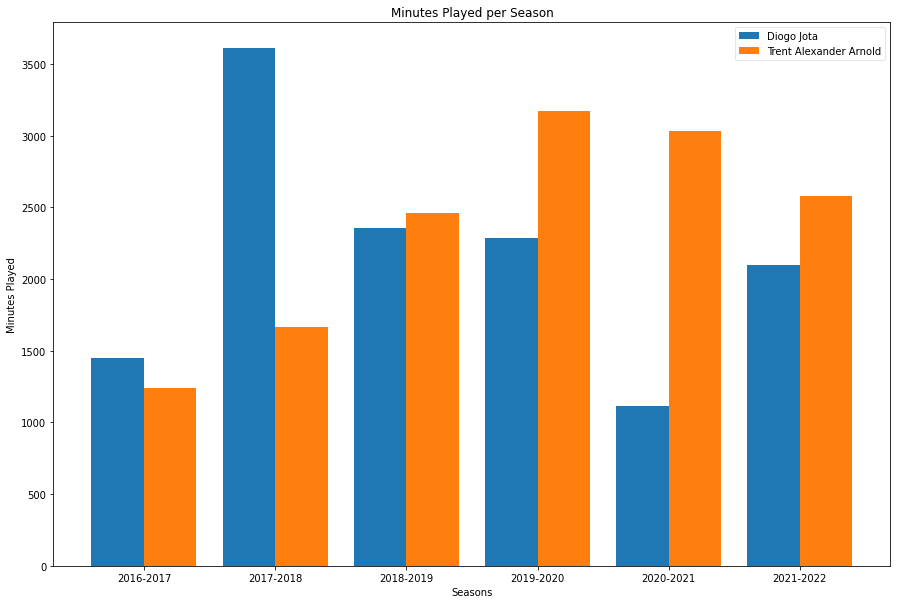

In [ ]:
jota_table = get_player_all_stats_standard_table(jota[0], jota[1])
jota_table = clean_standard_stats_table(jota_table)
taa_table = get_player_all_stats_standard_table(taa[0], taa[1])
taa_table = clean_standard_stats_table(taa_table)
alisson_table = get_player_all_stats_standard_table(alisson[0], alisson[1])
alisson_table = clean_standard_stats_table(alisson_table)
salah_table = get_player_all_stats_standard_table(salah[0], salah[1])
salah_table = clean_standard_stats_table(salah_table)
firmino_table = get_player_all_stats_standard_table(firmino[0], firmino[1])
firmino_table = clean_standard_stats_table(firmino_table)
mane_table = get_player_all_stats_standard_table(mane[0], mane[1])
mane_table = clean_standard_stats_table(mane_table)
compare_standard_stats_players((jota[1].replace('-', ' '), jota_table), (taa[1].replace('-', ' '), taa_table))

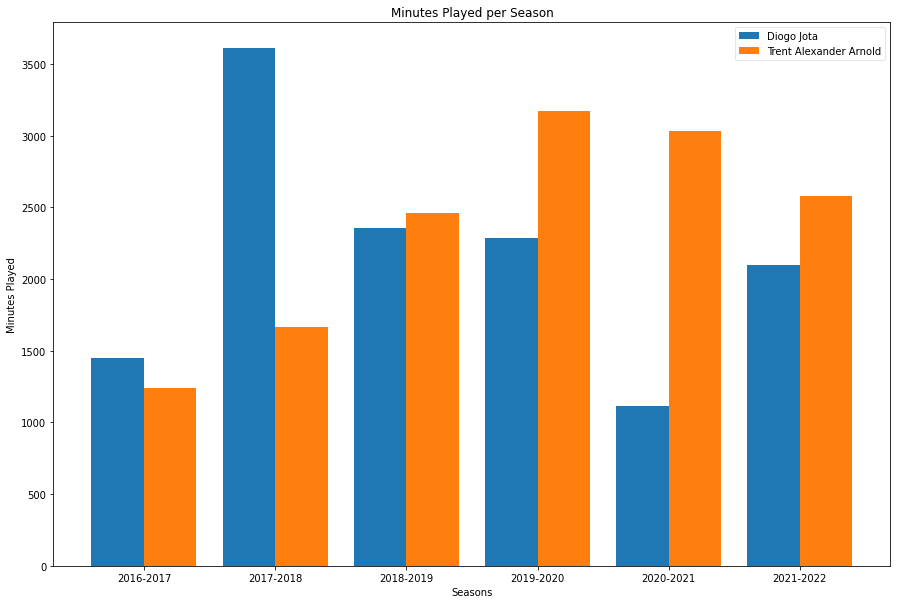

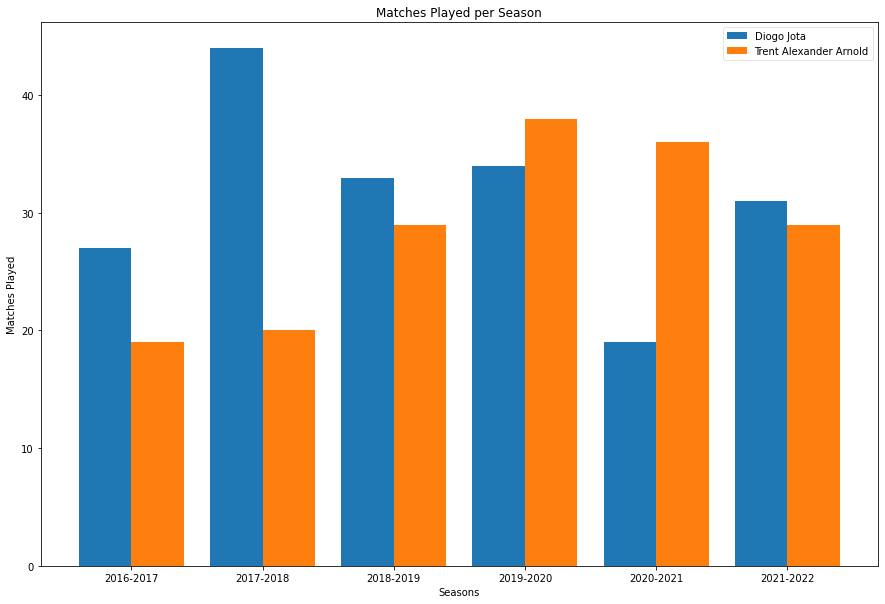

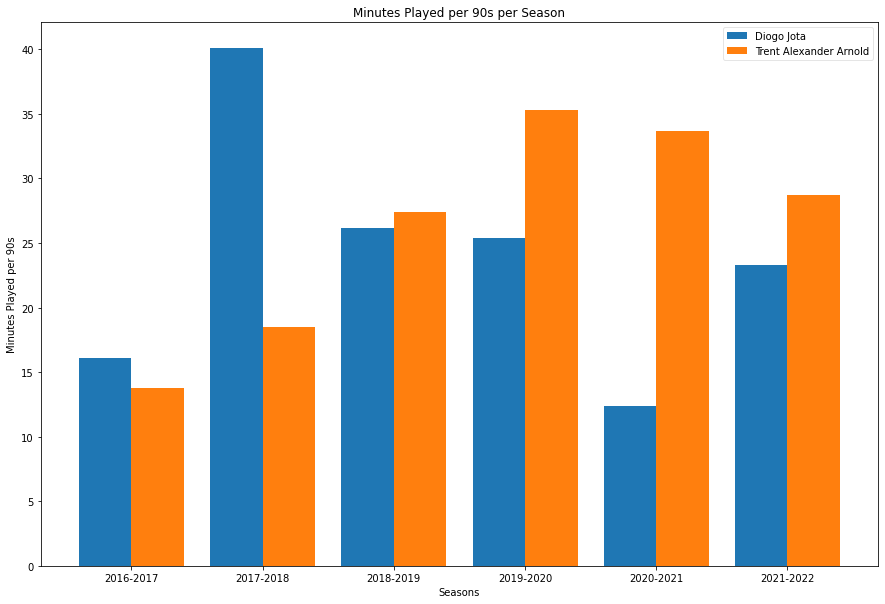

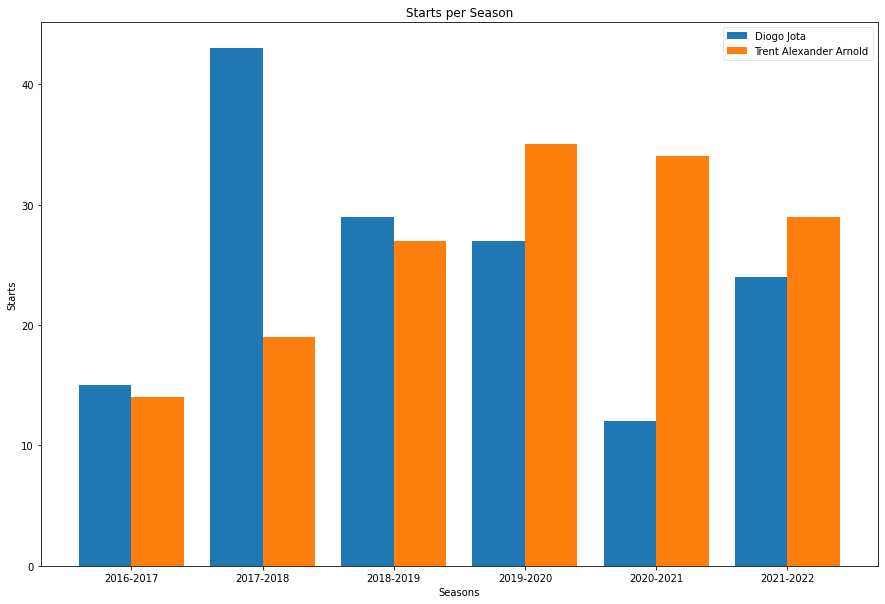

In [ ]:
compare_standard_stats_players((jota[1].replace('-', ' '), jota_table), (taa[1].replace('-', ' '), taa_table), comparison="Minutes Played")
compare_standard_stats_players((jota[1].replace('-', ' '), jota_table), (taa[1].replace('-', ' '), taa_table), comparison="Matches Played")
compare_standard_stats_players((jota[1].replace('-', ' '), jota_table), (taa[1].replace('-', ' '), taa_table), comparison="90s")
compare_standard_stats_players((jota[1].replace('-', ' '), jota_table), (taa[1].replace('-', ' '), taa_table), comparison="Starts")

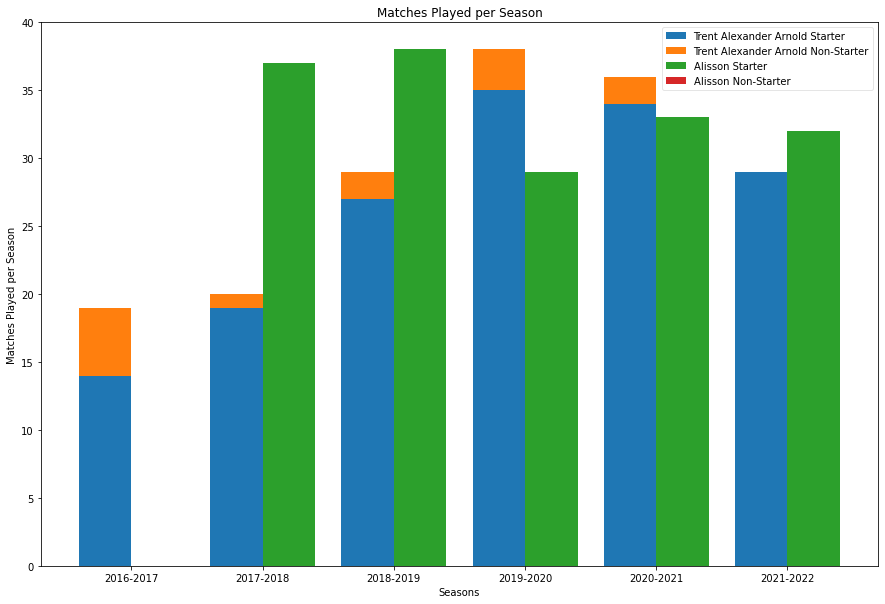

In [ ]:
compare_standard_stats_players((taa[1].replace('-', ' '), taa_table), (alisson[1].replace('-', ' '), alisson_table), comparison="Starts Stack")

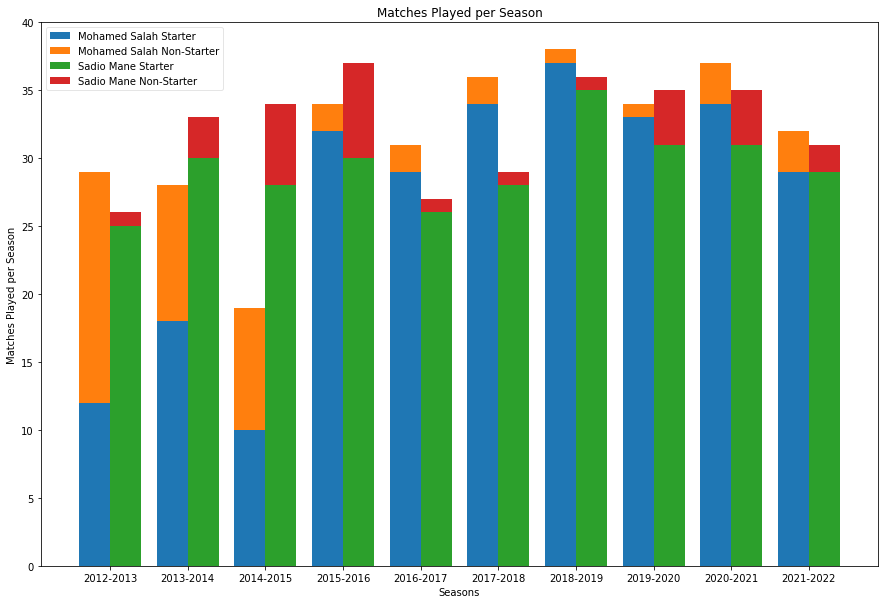

In [ ]:
compare_standard_stats_players((salah[1].replace('-', ' '), salah_table), (mane[1].replace('-', ' '), mane_table), comparison="Starts Stack")

In [ ]:
def clean_shooting_stats_table(raw_shooting_stats_table):
  # Change the column structure to make it just 1 level
  for col in raw_shooting_stats_table.columns:
    if 'unnamed' in col[0].lower():
      continue
    new_colname = col[0] + ' - ' + col[1]
    raw_shooting_stats_table.rename(columns={col[1]: new_colname}, inplace=True, level=1)
  raw_shooting_stats_table = raw_shooting_stats_table.droplevel(level=0, axis=1)

  # Drop mathces column and 
  raw_shooting_stats_table = raw_shooting_stats_table.drop(["Matches", "Squad", "Country", "Comp", "LgRank"], axis=1)
  # # Drop NaN values
  # raw_shooting_stats_table = raw_shooting_stats_table.dropna()
  
  # Convert string values to numeric
  for col in raw_shooting_stats_table.columns:
    if col in ["Season"]:
      continue
    raw_shooting_stats_table[col] = pd.to_numeric(raw_shooting_stats_table[col], errors='coerce', downcast='integer')

  # Group by and Aggregate
  shooting_stats_table = raw_shooting_stats_table.groupby(["Season"]).aggregate('sum')
  shooting_stats_table.reset_index(inplace=True)
  shooting_stats_table.set_index("Season", inplace=True)
  del raw_shooting_stats_table
  
  return shooting_stats_table

In [ ]:
def compare_shooting_stats_players(player_A_set: tuple, player_B_set: tuple, comparison='Goals', last_few_seasons=None):
  """
    player_A_set: tuple of (player_name of player A, table of player A)
    Comparison options:
    - 'Standard' Comparisons: ["Goals", "Shoot", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", "Dist", "Goals Stack"]
    - 'Expected' Comparisons: ["xG", "npxG", "npxG/Sh", "G-xG", "np:xG"]
  """
  # initialize category and comparison
  if comparison in ["Goals", "Shoot", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", "Dist", "Goals Stack"]:
    category = "Standard"
  elif comparison in ["xG", "npxG", "npxG/Sh", "G-xG", "np:xG"]:
    category = "Expected"
  else:
    # err = "Available 'Time Playing' Comparisons: Shoot on Target Percentage, Gls, Matches Played, 90s, Gls Stack \n Available 'Expected' Comparisons: xG, npxG, xA, npxG+xA"
    print("Available 'Time Playing' Comparisons:", ["Gls", "Shoot", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", "Dist", "Goals Stack"])
    print("Available 'Expected' Comparisons:", ["xG", "npxG", "npxG/Sh", "G-xG", "np:xG"])
    return

  # unpack the tuple
  player_A, table_A = player_A_set
  player_B, table_B = player_B_set
  table_A = table_A.copy()
  table_B = table_B.copy()

  # take subset of table with Playing Time in the column name while also removing the first index name
  assert (table_A.columns == table_B.columns).all()
  for col in table_A.columns:
    if category in col:
      table_A.rename(columns={col: col.replace(f"{category} - ", "")}, inplace=True)
      table_B.rename(columns={col: col.replace(f"{category} - ", "")}, inplace=True)
      continue
    table_A.drop(col, axis=1, inplace=True)
    table_B.drop(col, axis=1, inplace=True)
  
  # set axis for season length
  X_axis_A = np.arange(len(table_A.index))
  X_axis_B = np.arange(len(table_B.index))

  # get the fewest number of seasons recorded between two players to get similar comparisons
  season_len = len(X_axis_A) if len(X_axis_A) <= len(X_axis_B) else len(X_axis_B)
  X_axis = np.arange(season_len)

  # cut the table rows
  table_A = table_A[-season_len:].copy()
  table_B = table_B[-season_len:].copy()

  # expected metrics only recorded 5 seasons prior (since 2017-2018, code is created at April, 2022)
  if category == "Expected":
    table_A = table_A[-5:].copy()
    table_B = table_B[-5:].copy()
    X_axis = np.arange(len(table_A.index))
  
  # if the number of last few seasons is provided
  if last_few_seasons != None:
    if not isinstance(last_few_seasons, int):
      print("Please provide integer to specify last few seasons")
      return
    table_A = table_A[-last_few_seasons:].copy()
    table_B = table_B[-last_few_seasons:].copy()
    X_axis = np.arange(len(table_A.index))

  # initialize figure
  plt.figure(figsize=(15, 10))

  # get the rows where the seasons are recorded for both players
  index = table_A.index
  plt.xticks(X_axis, index)
  plt.xlabel("Seasons")

  # Standard Sections
  if comparison == "Goals":
    plt.bar(X_axis - 0.2, table_A['Gls'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['Gls'], width = 0.4, label = player_B)
    plt.ylabel("Goals Scored")
    plt.title("Goals Scored per Season")

  elif comparison == "Shoot":
    plt.bar(X_axis - 0.2, table_A['Sh'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['Sh'], width = 0.4, label = player_B)
    plt.ylabel("Shoot")
    plt.title("Shoot per Season")

  elif comparison == "SoT":
    plt.bar(X_axis - 0.2, table_A["SoT"], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B["SoT"], width = 0.4, label = player_B)
    plt.ylabel("Shoot on Target")
    plt.title("Shoot on Target per Season")

  elif comparison == "SoT%":
    plt.bar(X_axis - 0.2, table_A["SoT%"], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B["SoT%"], width = 0.4, label = player_B)
    plt.ylabel("Shoot on Target Percentage per 90s")
    plt.title("Shoot on Target Percentage per 90s per Season")

  elif comparison == "Goals Stack":
    table_A["Non-Penalty-Goals"] = table_A["Gls"] - table_A["PK"]
    table_B["Non-Penalty-Goals"] = table_B["Gls"] - table_B["PK"]
    plt.bar(X_axis - 0.2, table_A['Non-Penalty-Goals'], width = 0.4, label = player_A + ' Non-Penalty Goals')
    plt.bar(X_axis - 0.2, table_A['PK'], bottom = table_A["Non-Penalty-Goals"], width = 0.4, label = player_A + ' Penalty Goals')
    plt.bar(X_axis + 0.2, table_B['Non-Penalty-Goals'], width = 0.4, label = player_B + ' Non-Penalty Goals')
    plt.bar(X_axis + 0.2, table_B['PK'], bottom = table_B["Non-Penalty-Goals"], width = 0.4, label = player_B + ' Penalty Goals')
    plt.ylabel("Goals Scored per Season")
    plt.title("Goals Scored per Season")
    # setting y ticks
    max_y = max(table_A['Gls'].max(), table_B['Gls'].max())
    y_ticks = np.arange(0, max_y+5, 5)
    plt.yticks(y_ticks)
  
  # Expected Sections
  elif comparison == "xG":
    plt.bar(X_axis - 0.2, table_A['xG'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['xG'], width = 0.4, label = player_B)
    plt.ylabel("Expected Goals")
    plt.title("Expected Goals per Season")

  elif comparison == "npxG":
    plt.bar(X_axis - 0.2, table_A['npxG'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['npxG'], width = 0.4, label = player_B)
    plt.ylabel("non-penalty Expected Goals")
    plt.title("non-penalty Expected Goals per Season")

  elif comparison == "npxG/Sh":
    plt.bar(X_axis - 0.2, table_A['npxG/Sh'], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B['npxG/Sh'], width = 0.4, label = player_B)
    plt.ylabel("Expected non-penalty Goals per Shoot")
    plt.title("Expected non-penalty Goals per Shoot per Season")

  elif comparison == "G-xG":
    plt.bar(X_axis - 0.2, table_A["G-xG"], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B["G-xG"], width = 0.4, label = player_B)
    plt.ylabel("Goals - Expected Goals")
    plt.title("Goals - Expected Goals per Season")

  elif comparison == "np:G-xG":
    plt.bar(X_axis - 0.2, table_A["np:G-xG"], width = 0.4, label = player_A)
    plt.bar(X_axis + 0.2, table_B["np:G-xG"], width = 0.4, label = player_B)
    plt.ylabel("Non Penalty Goals - Non Penalty Expected Goals")
    plt.title("Non Penalty Goals - Non Penalty Expected Goals per Season")
  
  plt.legend(loc='best', framealpha=0.5)
  plt.show()
  return

In [ ]:
salah_sh_table = clean_shooting_stats_table(get_player_all_stats_standard_table(salah[0], salah[1], 'all_stats_shooting'))
mane_sh_table = clean_shooting_stats_table(get_player_all_stats_standard_table(mane[0], mane[1], 'all_stats_shooting'))
firmino_sh_table = clean_shooting_stats_table(get_player_all_stats_standard_table(firmino[0], firmino[1], 'all_stats_shooting'))
jota_sh_table = clean_shooting_stats_table(get_player_all_stats_standard_table(jota[0], jota[1], 'all_stats_shooting'))

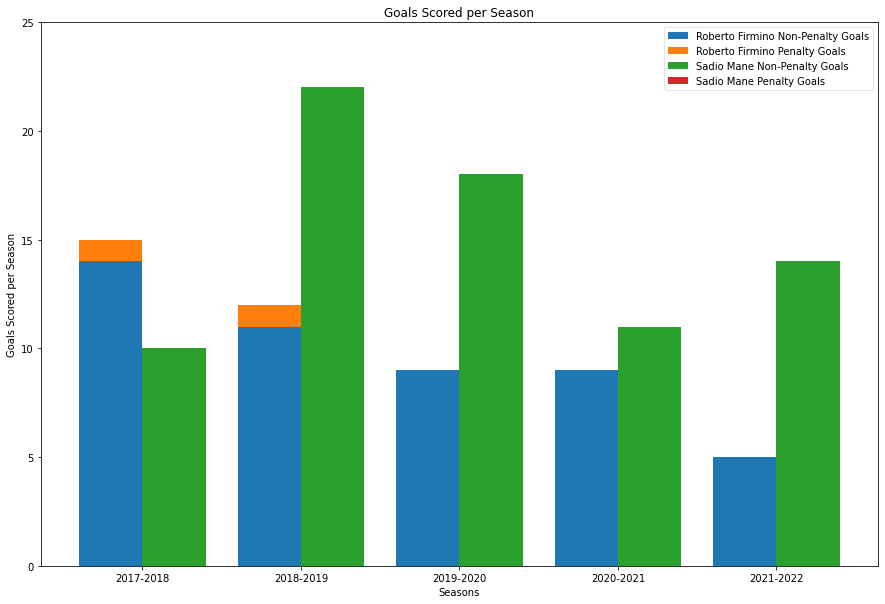

In [ ]:
compare_shooting_stats_players((firmino[1].replace('-', ' '), firmino_sh_table), (mane[1].replace('-', ' '), mane_sh_table), comparison="Goals Stack", last_few_seasons=5)
# compare_shooting_stats_players((salah[1].replace('-', ' '), salah_sh_table), (jota[1].replace('-', ' '), jota_sh_table), comparison="Goals Stack", last_few_seasons=5)

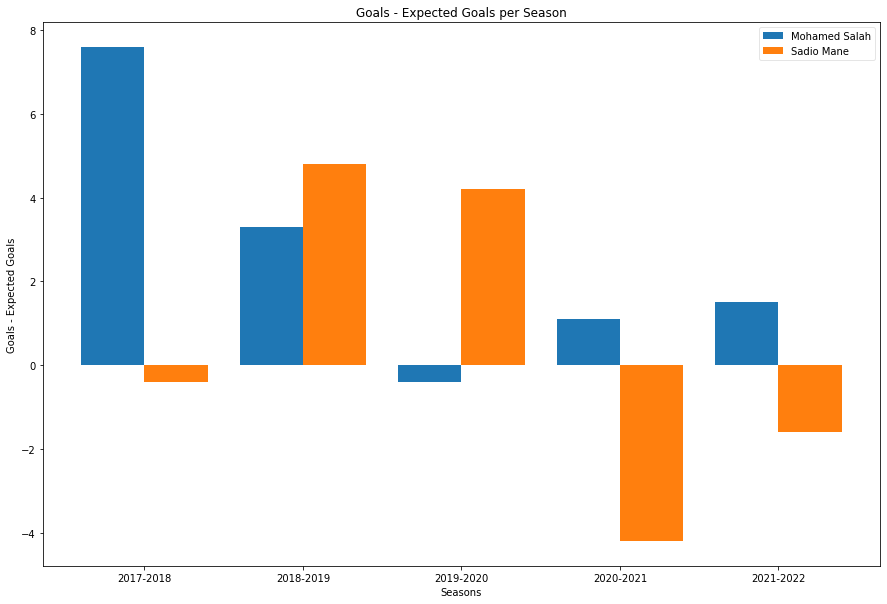

In [ ]:
compare_shooting_stats_players((salah[1].replace('-', ' '), salah_sh_table), (mane[1].replace('-', ' '), mane_sh_table), comparison="G-xG", last_few_seasons=5)

## Radar Plot
- https://www.youtube.com/watch?v=cXtC2EOQj6Q

In [ ]:
from soccerplots.radar_chart import Radar

In [ ]:
def compare_radar_players(player_A_set: tuple, player_B_set: tuple, category='Shooting', last_few_seasons=None):
  """
    player_A_set: tuple of (player_name, standard_stats_table, shooting_stats_table)
    Criteria:
      - Shooting: Goals, Shoot, SoT, SoT%, Goals/SoT, G/Shoot, xG, G-xG;
      - Expected: xG, xA, npxG+xA, npxG/Sh, npxG; G-xG, np:G-xG;
  """

  # unpack the tuple
  player_A, standard_table_A, shooting_table_A = player_A_set
  player_B, standard_table_B, shooting_table_B = player_B_set
  standard_table_A, shooting_table_A = standard_table_A.copy(), shooting_table_A.copy()
  standard_table_B, shooting_table_B = standard_table_B.copy(), shooting_table_B.copy()

  # get the necessary rows
  if category == "Shooting":
    pass
  elif category == "Expected":
    pass
  
  # define minimum-maximum values

  # create the radar

  
  return

## Plotting Function
- https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object
- https://medium.com/@mdhv.kothari99/matplotlib-into-django-template-5def2e159997
- https://www.section.io/engineering-education/representing-data-in-django-using-matplotlib/
- https://stackoverflow.com/questions/40534715/how-to-embed-matplotlib-graph-in-django-webpage


In [ ]:
# receive response for selected players
player_name = ''
# get the id associated with the players
player_id = ''
player_A = (player_id, player_name)
player_B = (player_id, player_name)
# scrap the data for each players
player_A_table = get_player_all_stats_standard_table(player_A[0], player_A[1])
player_A_table = clean_standard_stats_table(player_A_table)
player_B_table = get_player_all_stats_standard_table(player_B[0], player_B[1])
player_B_table = clean_standard_stats_table(player_B_table)
# plot
# return HttpResponse